In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Nomitech\Desktop\Anek\car data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
 df.shape

(301, 9)

In [6]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
df.drop('Car_Name',axis=1,inplace=True)
## We drop the Car name column beacuse there are better features for machine learning model

In [16]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
df['Current_Year']=2022

In [19]:
df['No_Year'] = df['Current_Year']-df['Year']
##We calculate the number of years for of each car

In [20]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [22]:
##Convert Categorical features to numerical values 
df=pd.get_dummies(df,drop_first=True)

In [23]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,2022,8,0,1,0,1
1,2013,4.75,9.54,43000,0,2022,9,1,0,0,1
2,2017,7.25,9.85,6900,0,2022,5,0,1,0,1
3,2011,2.85,4.15,5200,0,2022,11,0,1,0,1
4,2014,4.60,6.87,42450,0,2022,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2022,6,1,0,0,1
297,2015,4.00,5.90,60000,0,2022,7,0,1,0,1
298,2009,3.35,11.00,87934,0,2022,13,0,1,0,1
299,2017,11.50,12.50,9000,0,2022,5,1,0,0,1


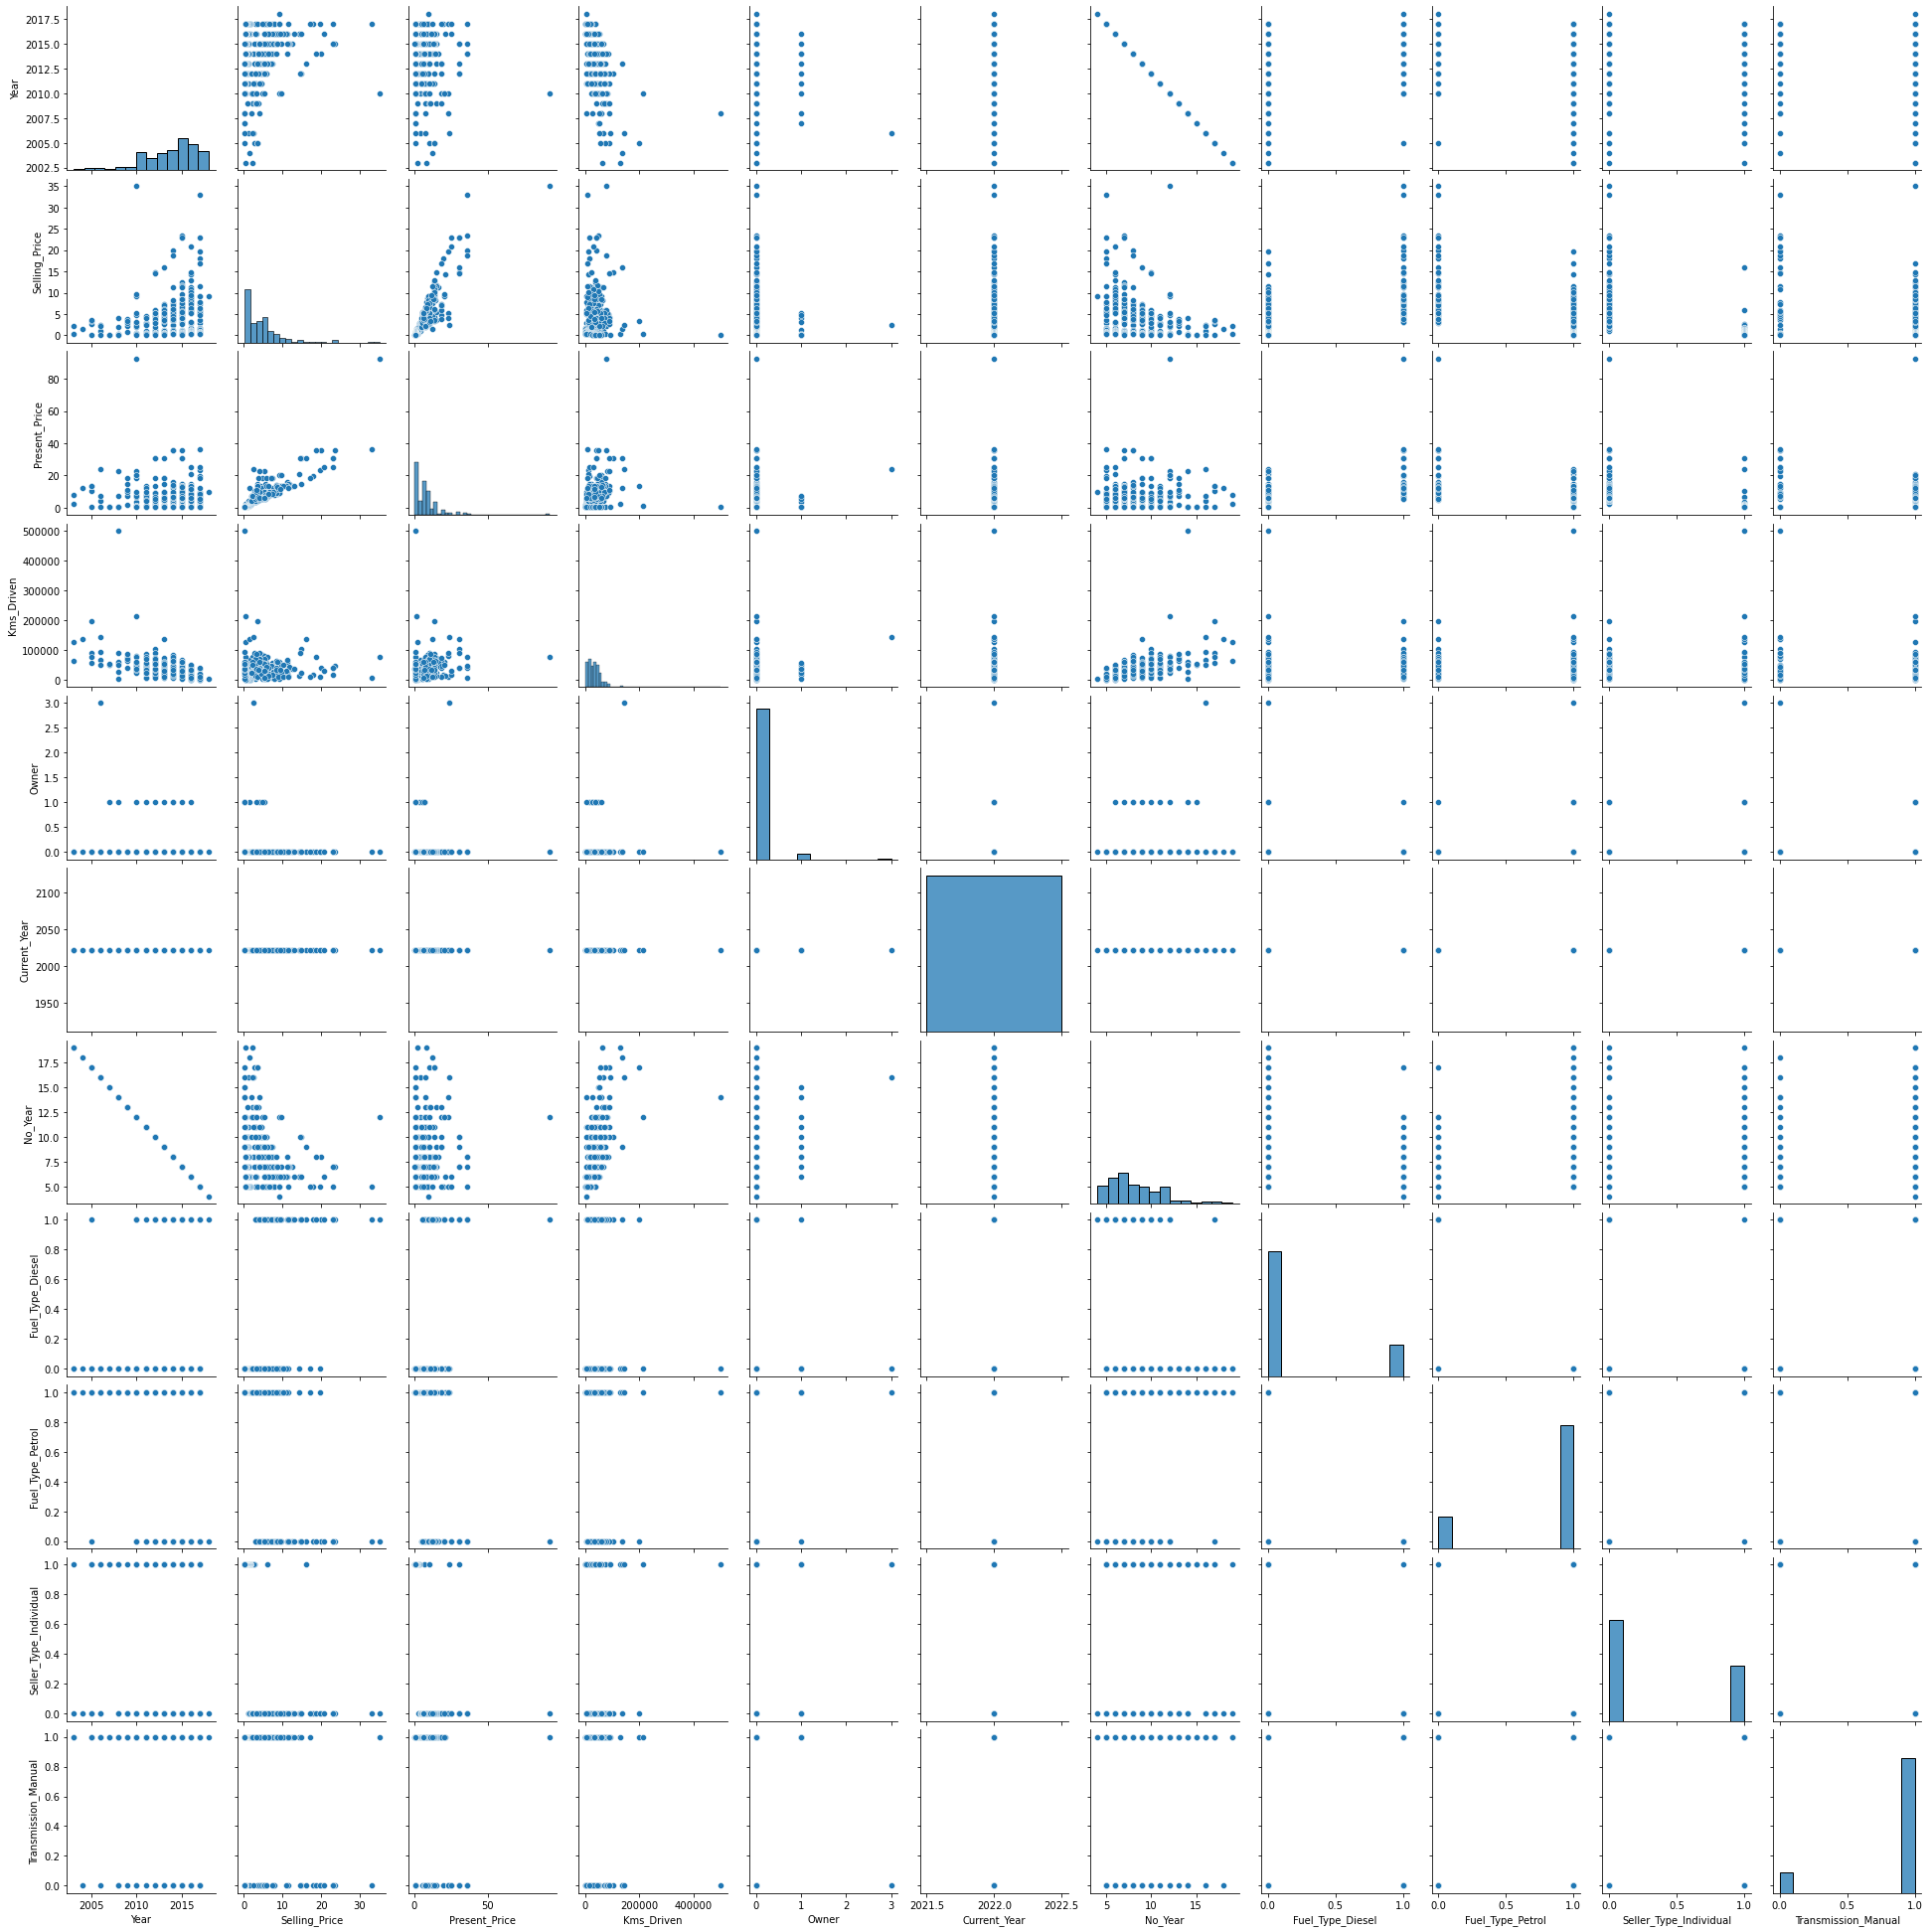

In [24]:
sns.pairplot(df)

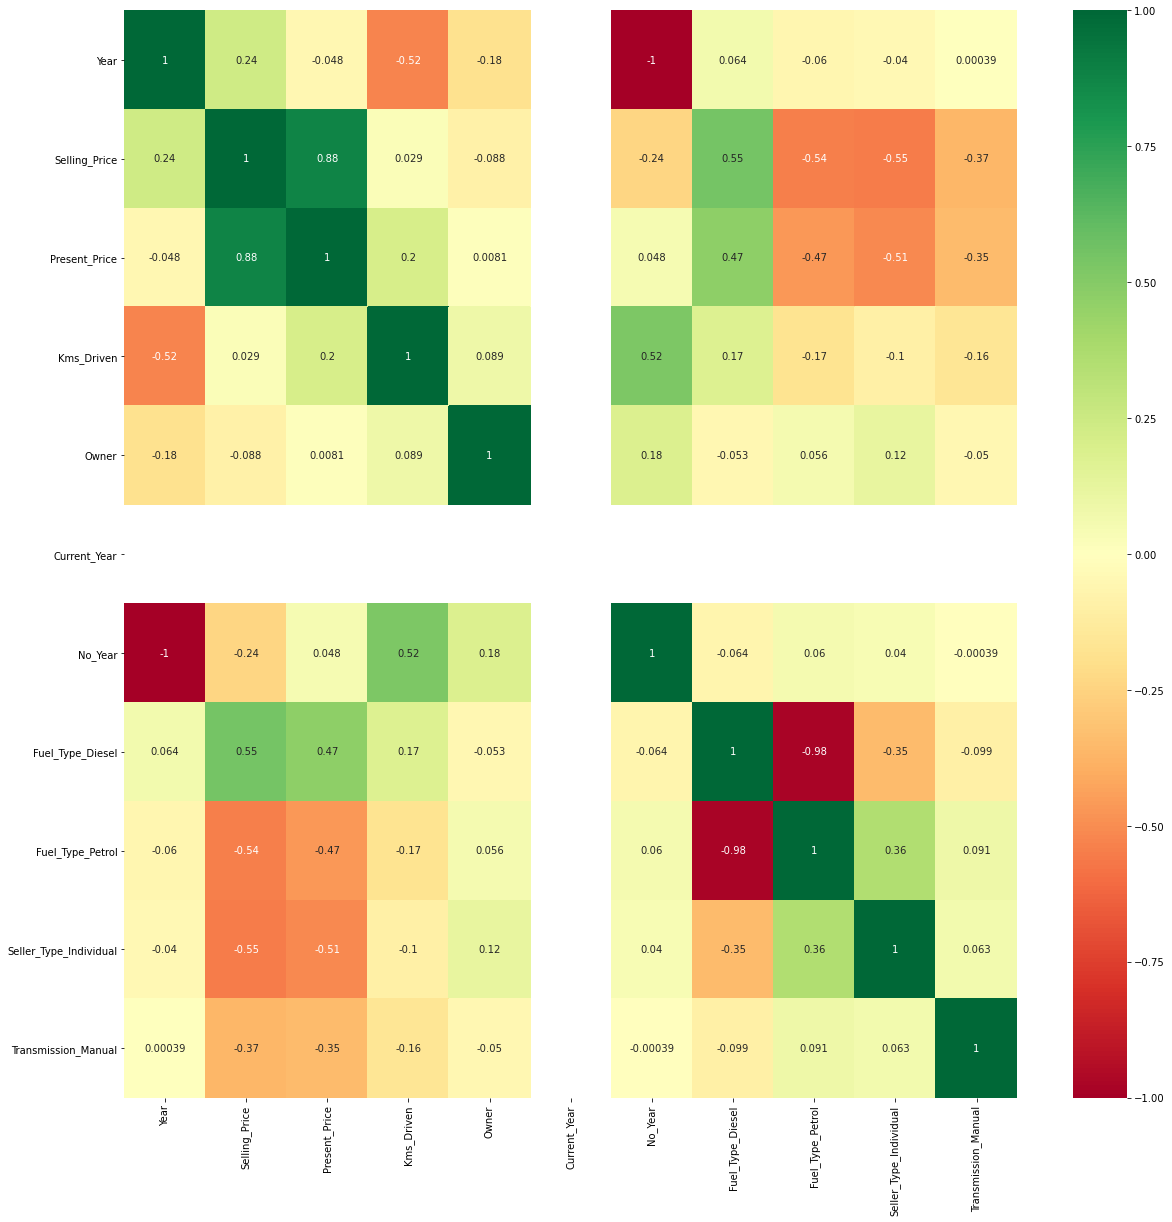

In [35]:
#We create a heatmap to check the most importand features
##We dont want to include features that are highly correlated to each other
corr=df.corr()
top_corr=corr.index
plt.figure(figsize=(20,20))
heat=sns.heatmap(df[top_corr].corr(),annot=True,cmap="RdYlGn")
##

In [51]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,2022,8,0,1,0,1
1,2013,4.75,9.54,43000,0,2022,9,1,0,0,1
2,2017,7.25,9.85,6900,0,2022,5,0,1,0,1
3,2011,2.85,4.15,5200,0,2022,11,0,1,0,1
4,2014,4.60,6.87,42450,0,2022,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2022,6,1,0,0,1
297,2015,4.00,5.90,60000,0,2022,7,0,1,0,1
298,2009,3.35,11.00,87934,0,2022,13,0,1,0,1
299,2017,11.50,12.50,9000,0,2022,5,1,0,0,1


In [52]:
##Undependent and dependent features
x = df.iloc[:,2:]
y = df.iloc[:,1]


In [53]:
x.head()

,Present_Price,Kms_Driven,Owner,Current_Year,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,2022,8,0,1,0,1
1,9.54,43000,0,2022,9,1,0,0,1
2,9.85,6900,0,2022,5,0,1,0,1
3,4.15,5200,0,2022,11,0,1,0,1
4,6.87,42450,0,2022,8,1,0,0,1


In [54]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [55]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model  = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [56]:
print(model.feature_importances_)

[3.74036997e-01 4.09269370e-02 3.29052416e-04 0.00000000e+00
 7.39554082e-02 2.31415977e-01 9.12213347e-03 1.25777453e-01
 1.44436042e-01]


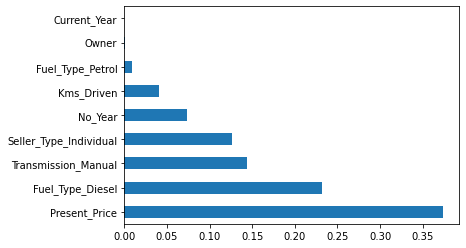

In [57]:
## Plot graph of feature importances for better visualization
feat_importance=pd.Series(model.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [58]:
##In our case we will use all the available features,
##it was just a demonstration on how to find the most important features using on the correlation 

,Present_Price,Kms_Driven,Owner,Current_Year,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,2022,8,0,1,0,1
1,9.54,43000,0,2022,9,1,0,0,1
2,9.85,6900,0,2022,5,0,1,0,1
3,4.15,5200,0,2022,11,0,1,0,1
4,6.87,42450,0,2022,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,11.60,33988,0,2022,6,1,0,0,1
297,5.90,60000,0,2022,7,0,1,0,1
298,11.00,87934,0,2022,13,0,1,0,1
299,12.50,9000,0,2022,5,1,0,0,1


In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
## WE will use random forest regression 
##in this case we dont neeed to perform any scaling

,Present_Price,Kms_Driven,Owner,Current_Year,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
184,0.750,26000,1,2022,14,0,1,1,1
132,0.950,3500,0,2022,5,0,1,1,1
194,0.787,50000,0,2022,14,0,1,1,1
75,6.800,36000,0,2022,7,0,1,0,1
111,1.500,8700,0,2022,6,0,1,1,1
...,...,...,...,...,...,...,...,...,...
188,0.570,18000,0,2022,9,0,1,1,1
71,12.480,45000,0,2022,11,1,0,0,1
106,3.450,16500,1,2022,8,0,1,1,1
270,10.000,69341,0,2022,11,0,1,0,1


In [62]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [63]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [64]:
from sklearn.model_selection import RandomizedSearchCV


In [65]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [66]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [67]:
rf = RandomForestRegressor()

In [68]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42,n_jobs=1)

In [69]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
y_pred =  rf_random.predict(x_test)

In [78]:
y_pred

array([ 0.59682, 10.24326,  5.15084,  0.26454,  7.00228,  6.24825,
        1.02362,  0.59865,  0.4881 ,  6.2838 , 10.91779,  0.93932,
        7.55902,  0.65666,  5.4113 ,  2.88306,  1.02562, 11.4265 ,
        0.58575,  1.46985,  0.51644,  8.57532,  5.88843,  2.78055,
        0.53282,  3.63185,  5.28535,  3.09907,  1.18806,  1.11115,
        0.64987,  9.58369,  0.42909,  2.67217,  7.90987,  4.12445,
        6.07106,  5.08531,  2.97086,  5.60884,  3.96852,  4.07885,
        4.8329 ,  0.54044,  6.95953,  0.59432,  7.26725,  6.49456,
        3.09315,  3.7148 ,  5.40065,  1.39856, 20.91548, 20.70942,
        6.68074,  9.08028,  5.20415,  9.30115,  2.62464,  7.23152,
        0.28252])

C:\Users\Nomitech\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

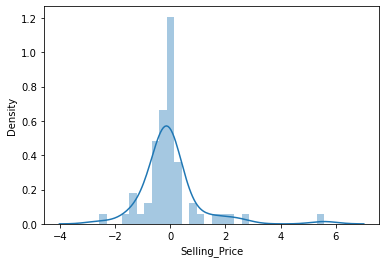

In [79]:
sns.distplot(y_test-y_pred)
## It seems that our data are normally distributed

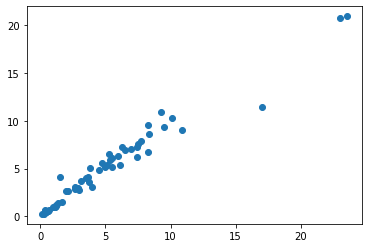

In [80]:
plt.scatter(y_test,y_pred)

In [86]:
from sklearn import metrics
print("MSE for DTReg (All features): " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MSE for DTReg (Features Selected): " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE for DTReg (All features): " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("MAE for DTReg (Features Selected): " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared for DTReg (All features): " , np.round(metrics.r2_score(y_test, y_pred), 2))
print("RSquared for DTReg (Features Selected): " , np.round(metrics.r2_score(y_test, y_pred), 2))


MSE for DTReg (All features):  1.17
MSE for DTReg (Features Selected):  1.17
MAE for DTReg (All features):  0.6
MAE for DTReg (Features Selected):  0.6
RSquared for DTReg (All features):  0.95
RSquared for DTReg (Features Selected):  0.95


In [88]:
error_score2 = metrics.r2_score(y_test,y_pred)

In [89]:
error_score2

0.9491402947624318

In [ ]:
eewwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww